## Conduct visual analysis and complete the prompts below.
This project was completed for the General Assembly Data Science Immersive course. The purpose was to build and refine our foundation of python and visually show interesting findings from the data set.

#### Side Notes:
- The data was sparse, it only showed data for the 50 states, distric of columbia.

#### Methodology:
- Accomplish the python prompts with as few lines of code as possible.
- Check the data for any cleanliness issues.
- Visualize the different distributions.
- Visualize any relationships in the data and identify outliers.
- Plot the state data as a USA heatmap.


#### PROMPT 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [2]:
import pandas as pd

In [3]:
#Data was imported using the pandas library for quick analysis.
data = pd.read_csv('../data/sat_scores.csv')
df = pd.DataFrame(data)
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
#After seeing state data there should be 50 rows. Check the shape to see if there is 50 rows.
df.shape

(52, 4)

In [5]:
#Ok.... there is 52... cool. We'll come back to that.

#### PROMPT 2. What does the data describe?

In [6]:
#The average SAT section score for each state. And the participation rate of that state in the SAT progam.

#### PROMPT 3. Does the data look complete? Are there any obvious issues with the observations?

In [8]:
#I printed the value counts and sorted them multiple times to check for data cleanliness.
#NOTE: I am only showing the top 5 of each here because I completed the analysis.
print "--------------"
print "STATE VALUE COUNTS"
print df['State'].value_counts()[:5]
print "--------------"
print "RATE VALUE COUNTS"
print df['Rate'].value_counts()[:5]
print "--------------"
print "VERBAL VALUE COUNTS"
print df['Verbal'].value_counts()[:5]
print "--------------"
print "MATH VALUE COUNTS"
print df['Math'].value_counts()[:5]

--------------
STATE VALUE COUNTS
SD    1
OR    1
CA    1
VA    1
NV    1
Name: State, dtype: int64
--------------
RATE VALUE COUNTS
9     3
4     3
8     3
5     2
65    2
Name: Rate, dtype: int64
--------------
VERBAL VALUE COUNTS
577    3
562    3
511    2
501    2
527    2
Name: Verbal, dtype: int64
--------------
MATH VALUE COUNTS
499    6
510    3
515    3
542    3
550    2
Name: Math, dtype: int64


In [9]:
# Data issues to note from earier. There since 50 rows were expected and 52 were found we looked to see what they were.
# 1: Is the district of columbia and should be included.
# 2: Is called "All" which needs further investigation below.

In [10]:
#Check what the values of the All row is.
df.iloc[51]

State     All
Rate       45
Verbal    506
Math      514
Name: 51, dtype: object

In [12]:
#This might be the sum total average for all the other rows in the dataframe. The below code attempts to confirm that theory.

In [7]:
#Look at the average score of the other states not including "All" and comparing it to the score above.
df[df['State'] != 'All'].Rate.mean()

37.0

In [13]:
#CONCLUSION: The above number is nowhere near the mean of the rate column.
#So this data does not represent the average of the column.
#However we will leave it in for now and if it proves to be an outlier we'll consider removing it.

#### PROMPT 4. Create a data dictionary for the dataset.

|Column | Description |
|-------|--------|
| State | <i>The state the data was taken from</i>|
| Rate | <i>Participation rate in taking the SAT</i> |
| Verbal | <i>Average verbal score for that state</i> |
| Math | <i>Average math score for that state</i> |

#### PROMPT 5. Load the data into a list of lists

In [15]:
import csv

In [16]:
#This is easier to accomplish with csv reader rather than Pandas so we'll reimport the data here.
with open('../data/sat_scores.csv', 'rU') as f:
    data = []
    reader = csv.reader(f)
    for row in reader:
        data.append(row)

#### PROMPT 6. Print the data

In [10]:
print data

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

#### PROMPT 7. Extract a list of the labels from the data, and remove them from the data.

In [17]:
#Setting the first row as a columns variable.
columns = data[0][:]
#Removing the first row(a.k.a the first list object) from the original data list.
data.pop(0)

['State', 'Rate', 'Verbal', 'Math']

#### PROMPT 8. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [18]:
#Use list comprehension for extracting the first element of each list into a new list.
states_list = [row[0] for row in data]
print states_list

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


#### PROMPT 9. Print the types of each column

In [13]:
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

#### PROMPT 10. Do any types need to be reassigned? If so, go ahead and do it.

In [19]:
#None that I can see. I should be able to work wiht floats just fine for what I need.

#### PROMPT 11. Create a dictionary for each column mapping the State to its respective value for that column. 

In [20]:
#Using data coprehension to set the first element of each list item as a 
#key and then use the rest of the list as the value.
sat_dict = {d[0]: d[1:] for d in data}
print sat_dict

{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'NE': ['8', '562', '568'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543', '542'], 'CT': ['82', '509', '510'],

#### PROMPT 12. Create a dictionary with the values for each of the numeric columns

In [21]:
#To accomplish this prompt we need a new list of columns that does not have the state column.
numeric_columns = columns[0:][1:4]
numeric_columns

['Rate', 'Verbal', 'Math']

In [22]:
#Dictionary comprehension with enumerate and an embedded list comprehension.
#NOTE: The start argument for the enumerate function is ignoring the state data in each list
#and returning only the numeric values to be mapped to our new numeric columns variable.
numeric_data = {column_name: [row[i] for row in data] for i, column_name in enumerate(numeric_columns, start=1)}
print numeric_data

{'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564'

#### PROMPT 13. Print the min and max of each column

In [23]:
print "RATE MINIMUM VALUE = ", df['Rate'].min()
print "RATE MAXIMUM VALUE = ", df['Rate'].max()
print "VERBAL MINIMUM VALUE = ", df['Verbal'].min()
print "VERBAL MAXIMUM VALUE = ", df['Verbal'].max()
print "MATH MINIMUM VALUE = ", df['Math'].min()
print "MATH MAXIMUM VALUE = ", df['Math'].max()

RATE MINIMUM VALUE =  4
RATE MAXIMUM VALUE =  82
VERBAL MINIMUM VALUE =  482
VERBAL MAXIMUM VALUE =  593
MATH MINIMUM VALUE =  439
MATH MAXIMUM VALUE =  603


#### PROMPT 14. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [25]:
#This is a simple formula to accomplish the prompt. There is a better way to do it in numpy so please do not
#use the example below as the best way.
import math
import numpy as np

def std(col):
   std = math.sqrt(sum((df[col] - np.mean(df[col])) ** 2) / (len(df) - 1))
   return std

print('Standard Deviation for Rate: ' + str(std('Rate')))
print('Standard Deviation for Verbal: ' + str(std('Verbal')))
print('Standard Deviation for Math: ' + str(std('Math')))

Standard Deviation for Rate: 27.3017880729
Standard Deviation for Verbal: 33.2362254438
Standard Deviation for Math: 36.0149750989


#### PROMPT 15. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [26]:
#Using seaborn, matplot lib, and plotly to accomplish the below tasks.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

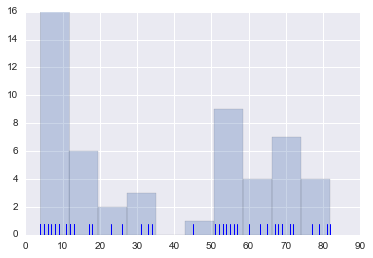

In [27]:
#Rugplots are in general more informative than histograms so I default to using them.
plt.hist(df.Rate, alpha=.3)
sns.rugplot(df.Rate);

In [28]:
#average rate by state:
df['Rate'].mean() 

37.15384615384615

#### PROMPT 16. Plot the Math distribution

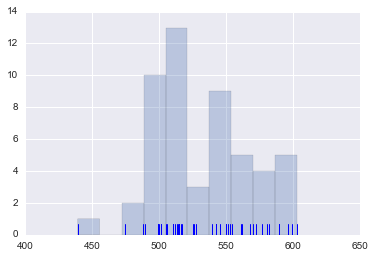

In [29]:
plt.hist(df.Math, alpha=.3)
sns.rugplot(df.Math);

In [59]:
#Average math score by state.
df['Math'].mean() 

531.5

#### PROMPT 17. Plot the Verbal distribution

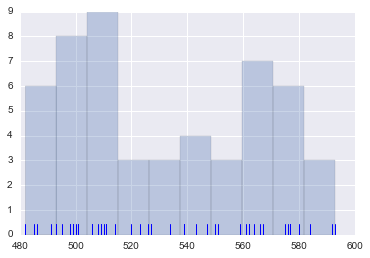

In [27]:
plt.hist(df.Verbal, alpha=.3)
sns.rugplot(df.Verbal);

In [61]:
#Average Verbal score by state.
df['Verbal'].mean() 

532.0192307692307

#### PROMPT 18. What is the typical assumption for data distribution?

In [30]:
#One typical assumption is that the data follows some kind of normal distribution.
#NORMAL CURVE: In this case the data does not seem to follow a true normal distribution.
#LOW SPREAD: Not a large spread with outliers of data.
#CENTERED: Data does not seem to have a good set of large points around the mean except in the case of the math column.

#### PROMPT 19. Does that distribution hold true for our data?

In [32]:
#Perhaps for the math data but not the other two.
#However we can still plot some interesting relationships below.

#### PROMPT 20. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

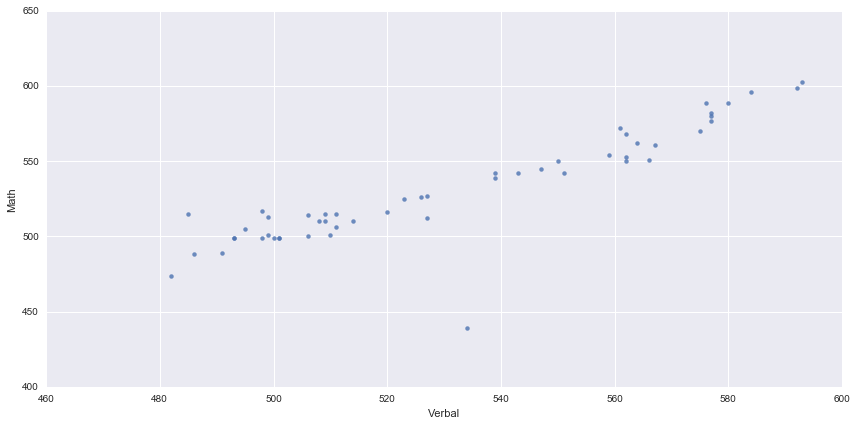

In [34]:
#VERBAL vs. MATH data points. This is not colored by state because there would be too many colors to track
#and draw any meaningful conclusions.
sns.lmplot('Verbal', 'Math', data=df, fit_reg=False,  aspect=2, size=6)

In [35]:
#All in all, the above plot is showing a pretty good relationship between math and verbal scores however
#There is one outlier to note that we will investigate further.

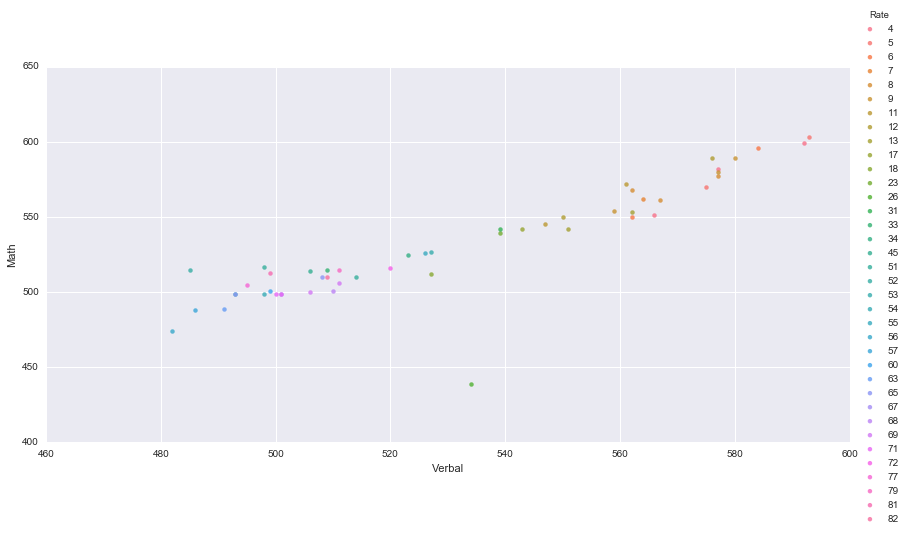

In [36]:
#Same scatter plot but with a hue for Rate. The reason being you can kind of see relationships between
#where the colors cluster but at the same time it also demonstrates why you don't color by large lists of points.
sns.lmplot('Verbal', 'Math', data=df, hue='Rate', fit_reg=False,  aspect=2, size=6)

#### PROMPT 21. Are there any interesting relationships to note?

In [37]:
#Calling a correlation plotting function that allows me to see relationships with more information than the standard
#pairplot.
def corr_pairs(df_input,coef_percentile):
    c = df_input.corr()
    s = c.unstack()
    so = s.sort_values(kind="quicksort")
    df_output = pd.DataFrame(so.abs(), columns=['coef'])
    df_output = df_output.reset_index()
    df_output.drop_duplicates('coef', inplace=True)
    df_output.dropna(inplace=True)
    df_output = df_output[(df_output['coef'] < 1) & (df_output.coef > np.percentile(df_output['coef'],coef_percentile))] #& (df_output.mse < np.percentile(df_output['mse'],mse_percentile))]
    #Plot the best pairs.
    for i in range(len(df_output.iloc[:,0:2])):
        colors = ['r', 'b']
        plt.scatter(df_output.iloc[i,0],df_output.iloc[i,1], data=df_input, c=colors)
        plt.xlabel(df_output.iloc[i,0])
        plt.ylabel(df_output.iloc[i,1])
        plt.legend()
        plt.show()
    return df_output

In [38]:
#First looking at numbers to see if anything is interesting here.
df.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


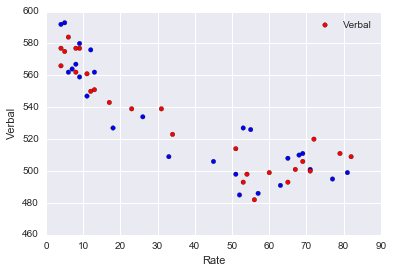

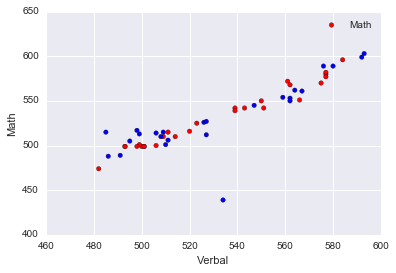

,level_0,level_1,coef
0,Rate,Verbal,0.886432
4,Verbal,Math,0.899871


In [47]:
corr_pairs(df,0)

In [39]:
### Conclusion: 
#There is a strong correlation between doing well on Verbal and well on Math unsuprisingly. 
#But another interesting takeaway is having a good participation rate is MUCH more strongly correlated
#to a good verbal score rather than a good Math score. Which suggests that the more people participated 
#in a states SAT test the higher the Verbal score but the not as high of a math score.
#Another interesting note is that Ohio is the outlier in the Math to Verbal correlation where 
#a Math score of only 439 was achieved but a Verbal score of 534 was achieved.

#### PROMPT 22. Create box plots for each variable. 

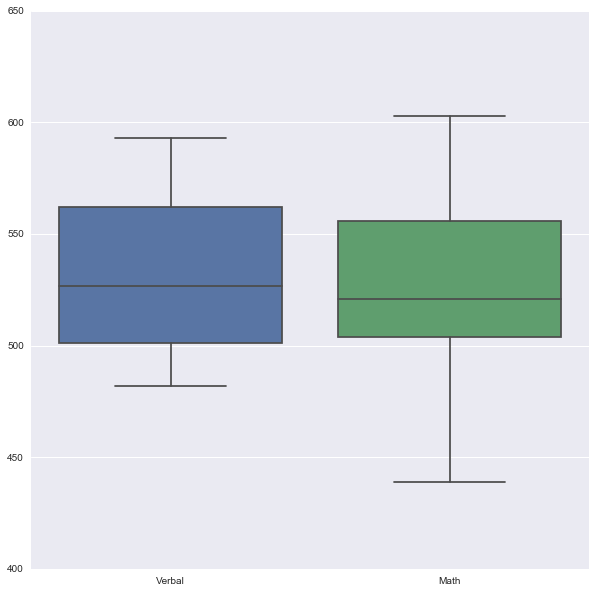

In [40]:
#Done using seaborn
plt.figure(figsize=(10,10))
sns.boxplot(data=df[['Verbal','Math']])

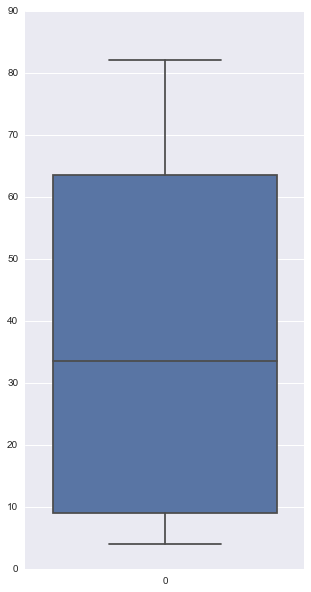

In [42]:
#Rate is on a different scale so needed to be plotted separately.
plt.figure(figsize=(5,10))
sns.boxplot(data=df['Rate'])

#### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [44]:
#So I didn't use tableau as I wanted to try my hand at using plotly for the first time. I don't know much
#about what is being done below but by using some of their out of the box features you get the benefit
#of having some interactive charts inside your jupyter notebook.
#Click on the jupyter notebook.
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [45]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['State'] 
    
data = [dict(
    type='choropleth',
    colorscale = scl,
    autocolorscale = False,
    locations = df['State'],
    z = df['Rate'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    hoverinfo = 'location+z',
    marker = dict(
        line = dict (
            color = 'rgb(255,255,255)',
            width = 2
        )
    ),
    colorbar = dict(
        title = "Rates"
    )
)]

layout = dict(
    title = 'SAT Participation Rates<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'
    )
)
    
fig = dict(data=data, layout=layout)

py.iplot(fig, validate=False, filename='d3-electoral-map')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~natejhall89/0 or inside your plot.ly account where it is named 'd3-electoral-map'


In [46]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['State'] 
    
data = [dict(
    type='choropleth',
    colorscale = scl,
    autocolorscale = False,
    locations = df['State'],
    z = df['Math'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    hoverinfo = 'location+z',
    marker = dict(
        line = dict (
            color = 'rgb(255,255,255)',
            width = 2
        )
    ),
    colorbar = dict(
        title = "Rates"
    )
)]

layout = dict(
    title = 'SAT Participation Rates<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'
    )
)
    
fig = dict(data=data, layout=layout)

py.iplot(fig, validate=False, filename='d3-electoral-map')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~natejhall89/0 or inside your plot.ly account where it is named 'd3-electoral-map'


In [47]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['State'] 
    
data = [dict(
    type='choropleth',
    colorscale = scl,
    autocolorscale = False,
    locations = df['State'],
    z = df['Verbal'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    hoverinfo = 'location+z',
    marker = dict(
        line = dict (
            color = 'rgb(255,255,255)',
            width = 2
        )
    ),
    colorbar = dict(
        title = "Rates"
    )
)]

layout = dict(
    title = 'SAT Participation Rates<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'
    )
)
    
fig = dict(data=data, layout=layout)

py.iplot(fig, validate=False, filename='d3-electoral-map')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~natejhall89/0 or inside your plot.ly account where it is named 'd3-electoral-map'
